Niall Carbery #22380966 <p>
Maya Kamboj #22402726

In [ ]:
from scipy.linalg import expm
import scipy.constants as const
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
!pip install ipympl
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

## Question 1
If we place an electron in a static magnetic field B = (0, 0, 0.5)^T
- What from does the Hamiltonian take?
- Can you find the evolution operator?


In [54]:
sigma_x = np.array([[0, 1],[1, 0]])
sigma_y = np.array([[0 , -1j],[1j, 0]])
sigma_z = np.array([[1, 0],[0, -1]])

spin_vector = np.array([sigma_x, sigma_y, sigma_z])

mag_field1 = np.array([[0],
                      [0],
                      [0.5]])
g_factor  = 2
bohr_magneton = const.physical_constants['Bohr magneton'][0]

hamiltonian = -((g_factor*bohr_magneton)/2)*(mag_field1[0]*spin_vector[0] + mag_field1[1]*spin_vector[1] + mag_field1[2]*spin_vector[2])
print('Hamilitonian form:\n', hamiltonian)

expm1 = expm((-1j*hamiltonian)/(const.hbar))
print('Evolution of Hamiltonian: \n', expm1)

Hamilitonian form:
 [[-4.63700504e-24+0.j -0.00000000e+00+0.j]
 [-0.00000000e+00+0.j  4.63700504e-24-0.j]]
Evolution of Hamiltonian: 
 [[0.97402987+0.22641953j 0.        +0.j        ]
 [0.        +0.j         0.97402987-0.22641953j]]


## Question 2
If the same electron starts in the inital state |e⟩t=0 = (\frac{0.95}{\sqrt 0.0975})
- Can you find the angles ϕ and 0 at the time t = 0
- What about the time t = 2.5 * 10**-11
- What is the probability of measuring a spin up state and a spin down state at these two times?, Comment on your result  with reference to the Bloch sphere diagrams from the notebook

In [55]:
initial_state = np.array([[0.95],[np.sqrt(1-0.95**2)]])

theta1 = 2*np.arccos(np.abs(initial_state[0]))
phi1  = np.angle(initial_state[1]) - np.angle(initial_state[0])

print('Theta =', theta1)
print('Phi =', phi1)

evolution_operator  = lambda time : expm(-1j*hamiltonian*time/(const.hbar))
time = 2.5*10**-11

current_state = np.matmul(evolution_operator(time), initial_state)
theta2 = 2*np.arccos(np.abs(current_state[0]))
phi2   = np.angle(current_state[1]) - np.angle(current_state[0])

print('New Theta =', theta2)
print('New Phi =', phi2)

up_state = np.array([[1], [0]])
down_state = np.array([[0], [1]])

def prob_up(state):
  return np.abs(np.matmul(np.transpose(np.conjugate(up_state)), state)[0][0])**2

def prob_down(state):
  return np.abs(np.matmul(np.transpose(np.conjugate(down_state)), state)[0][0])**2

print('Initial State:\n Probability Up:', prob_up(initial_state), ' \n Probability Down:', prob_down(initial_state))
print('Second State:\n Probability Up:', prob_up(current_state), ' \n Probability Down:', prob_down(current_state))

Theta = [0.63512086]
Phi = [0.]
New Theta = [0.63512086]
New Phi = [-2.19852501]
Initial State:
 Probability Up: 0.9025  
 Probability Down: 0.09750000000000003
Second State:
 Probability Up: 0.9024999999999997  
 Probability Down: 0.09750000000000003


The proabilities have not changed because our angle theta has not changed between states and thus probabilities of up and down do not change, despite relative phases changing as seen in Homework 1

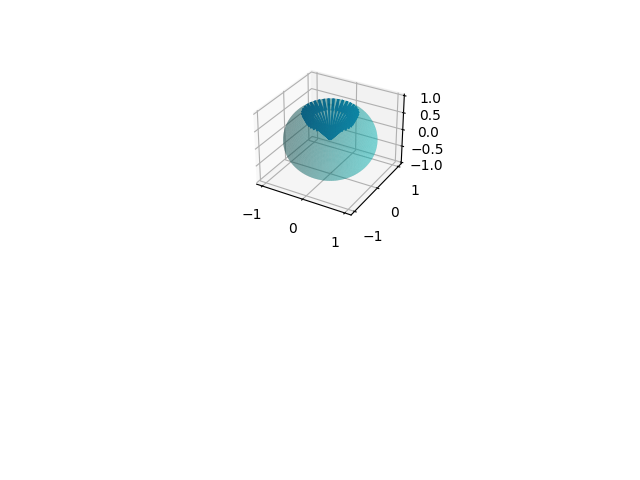

In [56]:

time = np.linspace(0,1e-10,50)

#Set colours and render
fig_bloch = plt.figure()
ax_bloch = fig_bloch.add_subplot(211, projection='3d')
ax_bloch.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

prob_up_time = []

for current_time in time:
  current_state = np.matmul(evolution_operator(current_time),initial_state)
  prob_up_time.append(prob_up(current_state))
  theta = 2*np.arccos(np.abs(current_state[0]))
  phi   = np.angle(current_state[1]) - np.angle(current_state[0])
  ax_bloch.quiver(0, 0, 0, np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta))

## Question 3
If we now place an electron in a static magnetic field B= (0.5, 0, 0)T
- What form does the Hamiltonian matrix take
- Can you find the evolution operator

In [57]:
mag_field2 = np.array([[0.5],
                      [0],
                      [0]])
g_factor  = 2
bohr_magneton = const.physical_constants['Bohr magneton'][0]

hamiltonian = -((g_factor*bohr_magneton)/2)*(mag_field2[0]*spin_vector[0] + mag_field2[1]*spin_vector[1] + mag_field2[2]*spin_vector[2])
print('Hamilitonian form:\n', hamiltonian)

expm2 = expm((-1j*hamiltonian)/(const.hbar))
print('Evolution of Hamiltonian: \n', expm2, 't')

Hamilitonian form:
 [[-0.00000000e+00+0.j -4.63700504e-24+0.j]
 [-4.63700504e-24+0.j -0.00000000e+00+0.j]]
Evolution of Hamiltonian: 
 [[0.97402987+0.j         0.        +0.22641953j]
 [0.        +0.22641953j 0.97402987+0.j        ]] t


# Question 4
If the electron in this new magnetic field strarts in the inital state |e⟩t=0 = (1, 0)^T
- Can you find the angles ϕ and 0 and at the time t=0
- What abouttine time t= 3.5*10*-11 s
- What is the probability of measuring a spin up state and a spin down state at these time. Comment on your result with reference to the Bloch Sphere diagram form the notebook

In [58]:
initial_state = np.array([[1],[0]])

theta1 = 2*np.arccos(np.abs(initial_state[0]))
phi1  = np.angle(initial_state[1]) - np.angle(initial_state[0])

print('Theta =', theta1)
print('Phi =', phi1)

evolution_operator  = lambda time : expm(-1j*hamiltonian*time/(const.hbar))
time = 3.5*10**-11

current_state = np.matmul(evolution_operator(time), initial_state)
theta2 = 2*np.arccos(np.abs(current_state[0]))
phi2   = np.angle(current_state[1]) - np.angle(current_state[0])

print('New Theta =', theta2)
print('New Phi =', phi2)

up_state = np.array([[1], [0]])
down_state = np.array([[0], [1]])

def prob_up(state):
  return np.abs(np.matmul(np.transpose(np.conjugate(up_state)), state)[0][0])**2

def prob_down(state):
  return np.abs(np.matmul(np.transpose(np.conjugate(down_state)), state)[0][0])**2

print('Initial State:\n Probability Up:', prob_up(initial_state), ' \n Probability Down:', prob_down(initial_state))
print('Second State:\n Probability Up:', prob_up(current_state), ' \n Probability Down:', prob_down(current_state))



Theta = [0.]
Phi = [0.]
New Theta = [3.07793502]
New Phi = [1.57079633]
Initial State:
 Probability Up: 1  
 Probability Down: 0
Second State:
 Probability Up: 0.0010127315559387996  
 Probability Down: 0.9989872684440613


The probabiltes evolve in the magentic field, where initally the state is in the [0,0] upper position in the bloch sphere before revolving between the upper and lower state in a circle

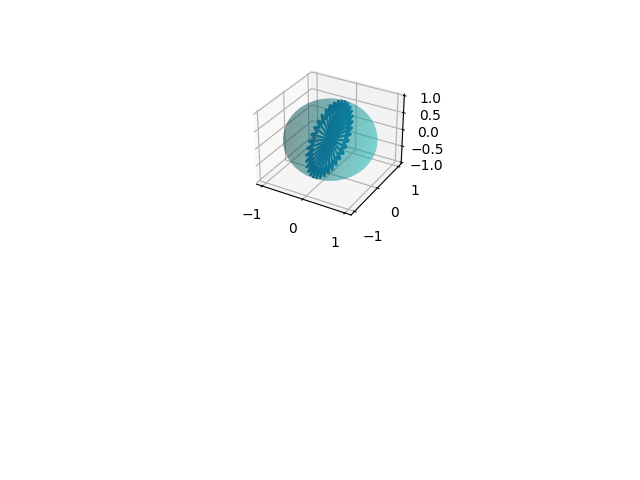

In [60]:

time = np.linspace(0,1e-10,50)

#Set colours and render
fig_bloch = plt.figure()
ax_bloch = fig_bloch.add_subplot(211, projection='3d')
ax_bloch.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

prob_up_time = []

for current_time in time:
  current_state = np.matmul(evolution_operator(current_time),initial_state)
  prob_up_time.append(prob_up(current_state))
  theta = 2*np.arccos(np.abs(current_state[0]))
  phi   = np.angle(current_state[1]) - np.angle(current_state[0])
  ax_bloch.quiver(0, 0, 0, np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta))